#### Setup

In [44]:
# Installing Libraries
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [45]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Loading Dataset
df = pd.read_csv("Dataset.csv")

In [47]:
#Display all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

#### Exploratory Data Analysis (EDA)

In [ ]:
# View first 5 rows
df.head(5)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

In [49]:
df.shape

(1470, 35)

In [13]:
import pandas as pd

# Assuming df is your DataFrame
unique_counts = df.nunique()

# Print the column names along with their unique value counts
for col, unique_count in unique_counts.items():
    if unique_count<2:
        print(f"{col}: {unique_count} ")




EmployeeCount: 1 
Over18: 1 
StandardHours: 1 


Text(0.5, 1.0, 'Attrition values')

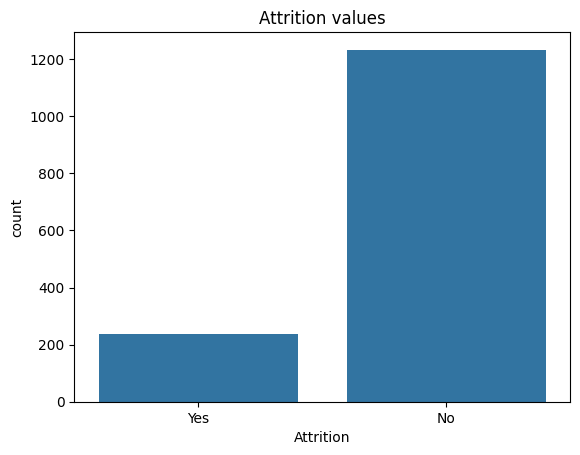

In [58]:
sns.countplot(x=df['Attrition'])
plt.title('Attrition values')


C:\Users\layas\AppData\Local\Temp\ipykernel_27440\474961821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition', y='MonthlyIncome', data=average_income_by_attrition, palette={'Yes': 'red', 'No': 'green'})


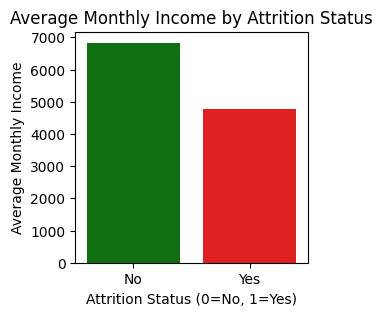

In [55]:
average_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(3, 3))
sns.barplot(x='Attrition', y='MonthlyIncome', data=average_income_by_attrition, palette={'Yes': 'red', 'No': 'green'})
plt.title('Average Monthly Income by Attrition Status')
plt.xlabel('Attrition Status (0=No, 1=Yes)')
plt.ylabel('Average Monthly Income')
plt.show()

#### Feature Selection

In [9]:
df=df.drop(columns=['EmployeeNumber',
                    'EmployeeCount',
                    'Over18',
                    'StandardHours'])

In [20]:
# Drop columns
df = df.drop(columns=['HourlyRate',
                      'JobInvolvement',
                      'JobLevel',
                      'MonthlyIncome',
                      'PercentSalaryHike',
                      'TotalWorkingYears',
                      'WorkLifeBalance',
                      'YearsAtCompany'])

#### Missing Values

In [24]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


Department          154
DistanceFromHome    148
dtype: int64


In [25]:
# Fill NaN with mode of the column
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

In [26]:
# Fill NaN with mean of the column
df['DistanceFromHome'] = df['DistanceFromHome'].fillna(df['DistanceFromHome'].mean())

In [23]:
["EmployeeCount","StandardHours","PerformanceRating"]

['EmployeeCount', 'StandardHours', 'PerformanceRating']

#### Feature Encoding

In [27]:
# Select all categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [28]:
for i in categorical_columns:
    print(i,df[i].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']


In [29]:
df_encoded = pd.get_dummies(df, columns=['Attrition','Gender','OverTime','MaritalStatus','JobRole','EducationField','Department'], drop_first=True)

In [30]:
BusinessTravel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df_encoded['BusinessTravel'] = df_encoded['BusinessTravel'].map(BusinessTravel_map)

In [31]:
# Select all categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object', 'category'])
categorical_columns.shape

(1470, 0)

In [33]:
df_encoded.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'Gender_Male', 'OverTime_Yes', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Department_Research & Development', 'Department_Sales'],
      dtype='object')

#### Normalization

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_encoded.drop(['Attrition_Yes'], axis=1))

In [35]:
# Convert the scaled array back to a DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=df_encoded.drop(['Attrition_Yes'], axis=1).columns)

# Now you can use .info() on the scaled DataFrame
x_scaled.describe()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,OverTime_Yes,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-1.643432e-16,5.075305e-17,-1.498423e-16,7.008755e-17,1.305078e-16,-9.183886e-17,3.021015e-17,1.450087e-17,-6.114534e-16,9.667248e-17,6.767074e-17,8.700523e-17,9.063045e-17,1.208406e-18,-2.779334e-17,4.350262e-17,-4.350262e-17,1.208406e-16,-4.471102e-17,-2.416812e-17,-8.338001e-17,4.350262e-17,-4.350262e-17,5.256566e-17,-4.471102e-17,1.208406e-18,1.450087e-17,-2.175131e-17,-4.229421e-17,5.921189e-17,3.746059e-17,1.329247e-17,-1.691768e-16,-5.437827e-18
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-2.042138e+00,-1.736576e+00,-1.071028e+00,-1.868426e+00,-1.575686e+00,-1.567907e+00,-1.717284e+00,-1.078504e+00,-4.262300e-01,-1.584178e+00,-9.320144e-01,-2.171982e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00,-1.224745e+00,-6.282411e-01,-9.189214e-01,-6.855655e-01,-1.914977e-01,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-8.374896e-01,-3.482549e-01,-6.791411e-01,-2.430593e-01,-3.140935e-01,-1.491202e+00,-6.124679e-01
25%,-7.581700e-01,-1.623992e-01,-8.366616e-01,-9.401446e-01,-8.916883e-01,-6.605307e-01,-6.608532e-01,-8.806440e-01,-6.780494e-01,-4.262300e-01,-6.589728e-01,-9.320144e-01,-6.201892e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01,-1.224745e+00,-6.282411e-01,-9.189214e-01,-6.855655e-01,-1.914977e-01,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-8.374896e-01,-3.482549e-01,-6.791411e-01,-2.430593e-01,-3.140935e-01,-1.491202e+00,-6.124679e-01
50%,-1.011589e-01,-1.623992e-01,-1.204135e-03,-1.548427e-01,8.504925e-02,2.546249e-01,2.462002e-01,-1.090645e-02,-2.775943e-01,-4.262300e-01,2.662326e-01,2.419883e-01,1.557071e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01,8.164966e-01,-6.282411e-01,-9.189214e-01,-6.855655e-01,-1.914977e-01,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-8.374896e-01,-3.482549e-01,-6.791411e-01,-2.430593e-01,-3.140935e-01,6.705998e-01,-6.124679e-01
75%,6.653541e-01,-1.623992e-01,8.788772e-01,3.686919e-01,1.061787e+00,1.169781e+00,1.153254e+00,8.641014e-01,5.233157e-01,-4.262300e-01,1.191438e+00,2.419883e-01,1.557071e-01,7.649976e-01,2.521455e-01,8.065415e-01,8.164966e-01,1.591746e+00,1.088232e+00,1.458650e+00,-1.914977e-01,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,1.194045e+00,-3.482549

#### Model Building

In [36]:
y=df_encoded['Attrition_Yes']

In [39]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x_scaled , y , test_size=0.25 , random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)
RF_model.score(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print( 'accuracy score: ' ,accuracy_score(y_test , RF_pred))

accuracy score:  0.875


Text(95.72222222222221, 0.5, 'True')

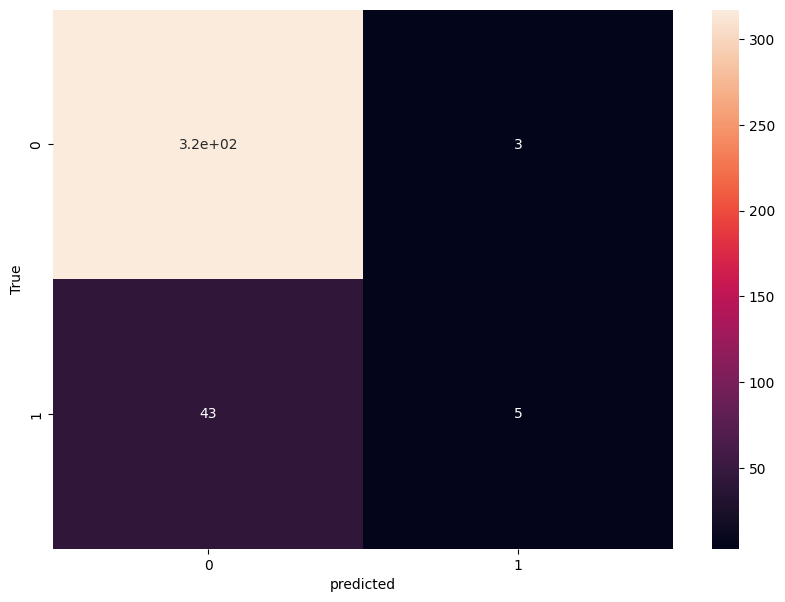

In [59]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('True')